In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('spam.csv')

In [3]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1055,ham,I'm at work. Please call,NaN,NaN,NaN
707,ham,Quite late lar... Ard 12 anyway i wun b drivin...,NaN,NaN,NaN
2994,ham,Mm not entirely sure i understood that text bu...,NaN,NaN,NaN
5419,ham,I'm at bruce &amp; fowler now but I'm in my mo...,NaN,NaN,NaN
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""


In [4]:
data.shape

(5572, 5)

### 1.Data Cleaning
### 2.EDA
### 3.Text Processing
### 4.Model Building
### 5.Evaluation
### 6.Improvement
### 7.Website
### 8.Deploy


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
print(data.head(5))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [7]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4965,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN
1029,ham,"Its good, we'll find a way",NaN,NaN,NaN
3736,ham,Plz note: if anyone calling from a mobile Co. ...,NaN,NaN,NaN
1536,ham,How's it feel? Mr. Your not my real Valentine ...,NaN,NaN,NaN
4308,ham,He dint tell anything. He is angry on me that ...,NaN,NaN,NaN


In [8]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
data.sample(5)

,v1,v2
2958,ham,Buzzzz! *grins* Did I buzz your ass? Buzz your...
4003,ham,Well there's a pattern emerging of my friends ...
1427,ham,THING R GOOD THANX GOT EXAMS IN MARCH IVE DONE...
2747,ham,Ya had just now.onion roast.
4255,ham,Aah! A cuddle would be lush! I'd need lots of ...


In [10]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)
data.sample(5)

,target,text
1689,ham,Bring tat cd don forget
4488,ham,The new deus ex game comin early next yr
3062,spam,"Hi babe its Jordan, how r u? Im home from abro..."
4494,ham,Hope this text meets you smiling. If not then ...
4201,ham,Are you happy baby ? Are you alright ? Did you...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
data['target']=encoder.fit_transform(data['target'])

In [13]:
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
data.duplicated().sum()

403

In [16]:
data=data.drop_duplicates(keep='first')

In [17]:
print(data.duplicated().sum())
print(data.shape)

0
(5169, 2)


## Data Analaysis

In [18]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

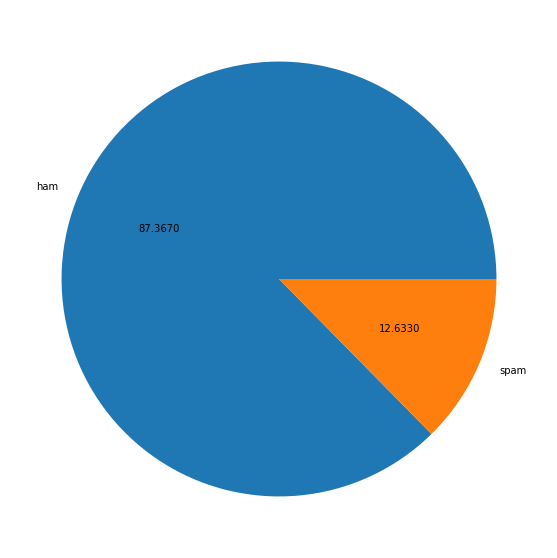

In [19]:
import matplotlib.pylab as plt
plt.figure(figsize=(10,10))
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct='%0.4f')
plt.show()

### data is imbalance

In [20]:
import nltk

In [21]:
data['numChar']=data['text'].apply(len)
data['numWord']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
data['numSent']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

<ipython-input-21-fac5677df051>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['numChar']=data['text'].apply(len)
<ipython-input-21-fac5677df051>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['numWord']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
<ipython-input-21-fac5677df051>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [22]:
data

,target,text,numChar,numWord,numSent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [23]:
data[['numChar','numWord','numSent']].describe()

,numChar,numWord,numSent
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
data[data['target']==0][['numChar','numWord','numSent']].describe()

,numChar,numWord,numSent
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
data[data['target']==1][['numChar','numWord','numSent']].describe()

,numChar,numWord,numSent
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [26]:
import seaborn as sns

<AxesSubplot:xlabel='numChar', ylabel='Count'>

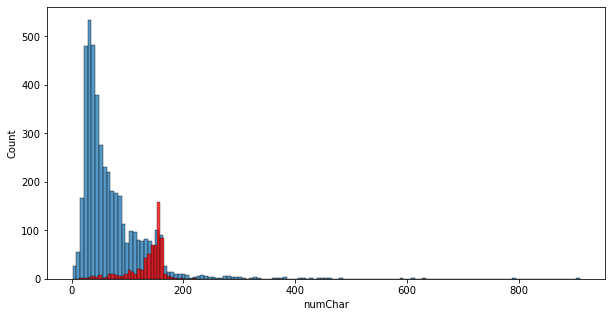

In [27]:

plt.figure(figsize=(10,5))
sns.histplot(data[data['target']==0]['numChar'])
sns.histplot(data[data['target']==1]['numChar'],color='red')


<AxesSubplot:xlabel='numWord', ylabel='Count'>

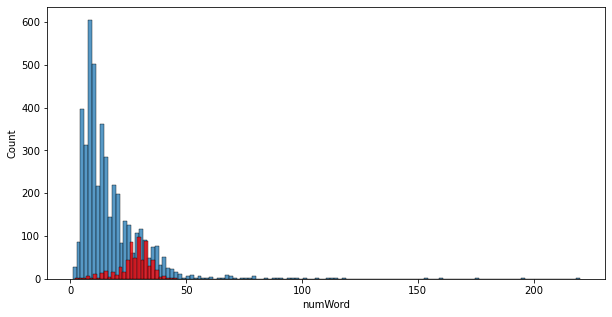

In [28]:

plt.figure(figsize=(10,5))
sns.histplot(data[data['target']==0]['numWord'])
sns.histplot(data[data['target']==1]['numWord'],color='red')


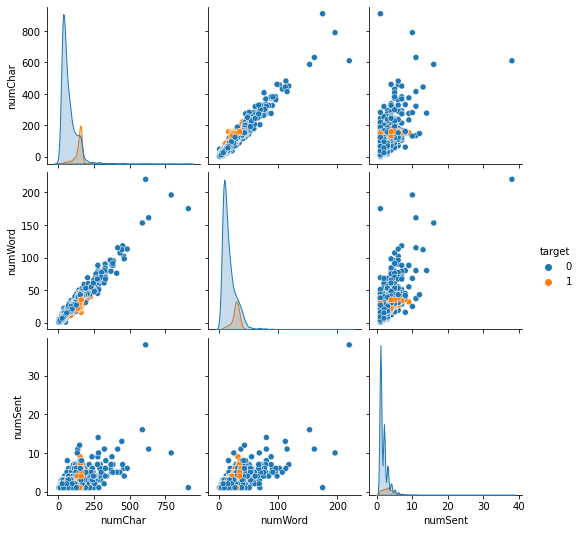

In [29]:
sns.pairplot(data,hue='target')


<AxesSubplot:>

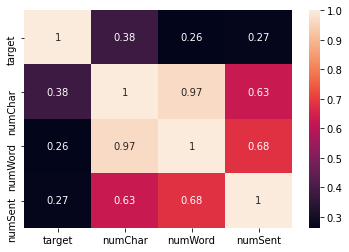

In [30]:
sns.heatmap(data.corr(),annot=True)

3. Data Preprocessing
- Lower Case
- Tokenization
- Removing Special Character
- Removing stop words and punctuation
- Stemming

In [31]:
from nltk.corpus import stopwords
stopword=stopwords.words('english')

In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [34]:
y=['mant','han']
z=y.copy
y.append('Manthan')
print(z)


<built-in method copy of list object at 0x00000172F9D55C40>


In [35]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y.copy()
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y.copy()
    y.clear()
    for i in text:
        y.append(ps.stem(i))
  
    
    return " ".join(y)
    


In [36]:
list=['Manthan','Dhole','hiwara']
print(" & ".join(list))

Manthan & Dhole & hiwara


In [37]:
data['transform_text']=data['text'].apply(transform_text)

<ipython-input-37-6738454496b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transform_text']=data['text'].apply(transform_text)


In [38]:
data.sample(5)

,target,text,numChar,numWord,numSent,transform_text
526,1,Today's Offer! Claim ur �150 worth of discount...,158,36,8,today offer claim ur worth discount voucher te...
4362,0,Evry Emotion dsn't hav Words.Evry Wish dsn't h...,180,44,2,evri emot ds hav wish ds hav prayr u smile wor...
2168,0,Thx. All will be well in a few months,37,10,2,thx well month
3606,0,I have no idea where you are,28,7,1,idea
4165,0,Well if I'm that desperate I'll just call arma...,54,12,1,well desper call armand


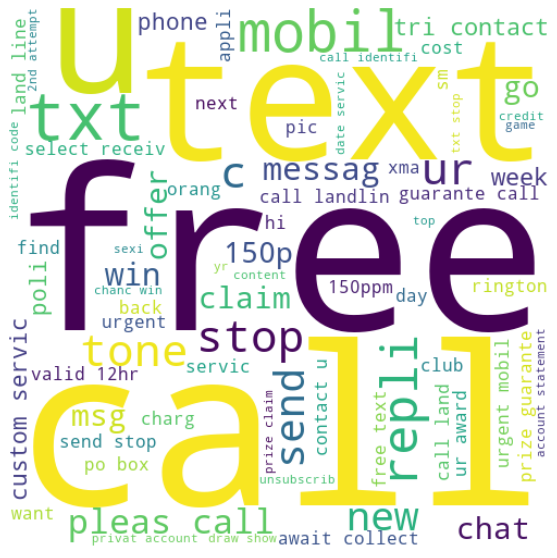

In [39]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500,min_font_size=10,background_color='white')
plt.figure(figsize=(10,10))


wc.generate(data[data['target']==1]['transform_text'].str.cat(sep=' '))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

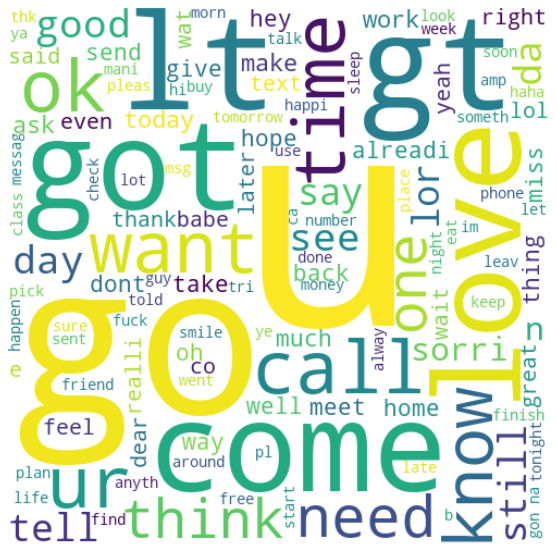

In [40]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500,min_font_size=10,background_color='white')
plt.figure(figsize=(10,10))


wc.generate(data[data['target']==0]['transform_text'].str.cat(sep=' '))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
spam_corpus=[]
for msg in data[data['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus)

9941

In [43]:
ham_corpus=[]
for msg in data[data['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

In [45]:
from collections import Counter


c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


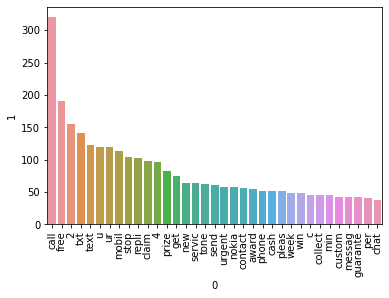

In [46]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(35))[0],pd.DataFrame(Counter(spam_corpus).most_common(35))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building

In [47]:
data

,target,text,numChar,numWord,numSent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [49]:
x=tfidf.fit_transform(data['transform_text']).toarray()

In [50]:
x.shape

(5169, 6677)

In [51]:
y=data['target'].values

In [52]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
from sklearn.model_selection import train_test_split


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [57]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))
print(precision_score(y_test,y_pred1))

0.8636363636363636
[[786  19]
 [122 107]]
0.4672489082969432


In [58]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))
print(precision_score(y_pred2,y_test))

0.9506769825918762
[[908  51]
 [  0  75]]
0.5952380952380952


In [59]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9632495164410058
[[902   6]
 [ 32  94]]
0.94
